In [422]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import preProcessing_uniTeh as pu
from scipy import stats
from IPython.core.display import display, HTML
from pylab import rcParams

In [226]:
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

In [227]:
import warnings
warnings.filterwarnings("ignore")

In [228]:
data = pd.read_csv('F:/O_C/T_U_C/dS_C9/7_Py(T)/3T/projects_classification/HR/cleanHRData.csv')

In [229]:
df = data.copy()

In [230]:
X = df.drop('left', axis=1)
y = df.left

In [231]:
X.shape

(11991, 17)

In [232]:
y.shape

(11991,)

In [233]:
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.318681,0.265625,0.0,0.285047,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.780220,0.781250,0.6,0.775701,1.00,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.021978,0.812500,1.0,0.822430,0.50,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.692308,0.796875,0.6,0.593458,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.307692,0.250000,0.0,0.294393,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11986,0.890110,0.296875,0.2,0.761682,1.00,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
11987,0.714286,0.921875,0.6,0.794393,1.00,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
11988,0.835165,0.281250,0.2,0.415888,1.00,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
11989,0.263736,0.453125,0.2,0.355140,1.00,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [234]:
y

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
11986    0.0
11987    0.0
11988    0.0
11989    0.0
11990    0.0
Name: left, Length: 11991, dtype: float64

In [303]:
X_train = pd.read_csv('F:/O_C/T_U_C/dS_C9/7_Py(T)/3T/projects_classification/HR/X_train_cleanHRData.csv')
X_test = pd.read_csv('F:/O_C/T_U_C/dS_C9/7_Py(T)/3T/projects_classification/HR/X_test_cleanHRData.csv')
y_train = pd.read_csv('F:/O_C/T_U_C/dS_C9/7_Py(T)/3T/projects_classification/HR/y_train_cleanHRData.csv')
y_test = pd.read_csv('F:/O_C/T_U_C/dS_C9/7_Py(T)/3T/projects_classification/HR/y_test_cleanHRData.csv')

In [304]:
y_train

,left
0,0
1,0
2,0
3,0
4,0
...,...
9587,1
9588,0
9589,0
9590,0


In [305]:
y_train = y_train.left

In [306]:
y_train

0       0
1       0
2       0
3       0
4       0
       ..
9587    1
9588    0
9589    0
9590    0
9591    0
Name: left, Length: 9592, dtype: int64

In [307]:
y_test = y_test.left

In [308]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9592, 17)
(2399, 17)
(9592,)
(2399,)


In [393]:
X_train_new = X_train
X_test_new = X_test

In [241]:
# RFE: Recursive Feature Elimination
# VIF: variance inflation factor

from sklearn.feature_selection import RFE
# from sklearn.linear_model import LinearRegression  #predict #dummy #ffill, bfill
from sklearn.tree import DecisionTreeClassifier
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [394]:
from sklearn.metrics import accuracy_score

for i in range(1, X_train.shape[1]+1):
#     lm = LinearRegression() #creat LR model on train set
#     lm.fit(X_train,y_train)
    
    DT = DecisionTreeClassifier()
    DT.fit(X_train, y_train)
    
    rfe = RFE(DT, i) #fit RFE model with different number of features 1 to 32
    rfe = rfe.fit(X_train, y_train)
    
    y_pred= rfe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    if acc>0.97:
        best_n_feature = i
        print('best number of feature:',best_n_feature)
        print('acc based on best number of feature:',acc)

best number of feature: 5
acc based on best number of feature: 0.9729053772405168
best number of feature: 6
acc based on best number of feature: 0.9754064193413923
best number of feature: 7
acc based on best number of feature: 0.9716548561900792
best number of feature: 8
acc based on best number of feature: 0.9737390579408086
best number of feature: 9
acc based on best number of feature: 0.9712380158399333
best number of feature: 10
acc based on best number of feature: 0.9712380158399333
best number of feature: 12
acc based on best number of feature: 0.9704043351396415
best number of feature: 14
acc based on best number of feature: 0.9708211754897874
best number of feature: 15
acc based on best number of feature: 0.9729053772405168
best number of feature: 17
acc based on best number of feature: 0.9704043351396415


In [395]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

rfe = RFE(DT, 11)
rfe = rfe.fit(X_train, y_train)

# RFE (MODEL, Number of feature to select)

In [396]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('satisfaction_level', True, 1),
 ('last_evaluation', True, 1),
 ('number_project', True, 1),
 ('average_montly_hours', True, 1),
 ('time_spend_company', True, 1),
 ('Work_accident', True, 1),
 ('promotion_last_5years', False, 4),
 ('salary', True, 1),
 ('RandD', True, 1),
 ('accounting', False, 2),
 ('hr', False, 7),
 ('management', False, 3),
 ('marketing', False, 5),
 ('product_mng', False, 6),
 ('sales', True, 1),
 ('support', True, 1),
 ('technical', True, 1)]

In [397]:
X_train.columns[rfe.support_]

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'salary',
       'RandD', 'sales', 'support', 'technical'],
      dtype='object')

In [398]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,salary,RandD,sales,support,technical
0,0.494505,0.203125,0.4,0.261682,0.25,1.0,0.5,0.0,1.0,0.0,0.0
1,0.890110,0.515625,0.4,0.355140,0.25,0.0,0.5,0.0,0.0,0.0,0.0
2,0.879121,0.812500,0.2,0.322430,0.50,0.0,0.5,0.0,1.0,0.0,0.0
3,0.945055,0.593750,0.2,0.542056,0.25,0.0,0.5,0.0,1.0,0.0,0.0
4,0.802198,0.500000,0.0,0.883178,0.00,0.0,0.5,0.0,0.0,1.0,0.0


In [399]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns


# pythonic
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
  
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

#reset_index()

,Features,VIF
3,average_montly_hours,5.91
1,last_evaluation,5.86
0,satisfaction_level,4.51
2,number_project,4.06
4,time_spend_company,2.39
6,salary,1.82
8,sales,1.66
10,technical,1.47
9,support,1.39
5,Work_accident,1.17


In [400]:
# from sklearn.feature_selection import RFE
# from sklearn.tree import DecisionTreeClassifier
# import statsmodels.api as sm 
# from statsmodels.stats.outliers_influence import variance_inflation_factor

In [401]:
# def build_model(X,y):
#     X = sm.add_constant(X)  #Adding the constant
#     lm = sm.OLS(y,X).fit()  # fitting the model
#     print(lm.summary())     # model summary
#     return X

  
def build_model(X, y):
    logit_model = sm.Logit(y, X).fit()
    print(logit_model.summary())
    return X

def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    
    #pythonic
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)


In [402]:
checkVIF(X_train_rfe)

,Features,VIF
3,average_montly_hours,5.91
1,last_evaluation,5.86
0,satisfaction_level,4.51
2,number_project,4.06
4,time_spend_company,2.39
6,salary,1.82
8,sales,1.66
10,technical,1.47
9,support,1.39
5,Work_accident,1.17


In [403]:
X_train_new = build_model(X_train_rfe,y_train)

Optimization terminated successfully.
         Current function value: 0.354209
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   left   No. Observations:                 9592
Model:                          Logit   Df Residuals:                     9581
Method:                           MLE   Df Model:                           10
Date:                Wed, 02 Feb 2022   Pseudo R-squ.:                  0.2166
Time:                        07:51:59   Log-Likelihood:                -3397.6
converged:                       True   LL-Null:                       -4336.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
satisfaction_level      -3.6173      0.108    -33.564      0.000      -3.829      -3.406

In [404]:
X_train_new = X_train_rfe.drop(["support"], axis = 1)

In [405]:
X_train_new = build_model(X_train_new,y_train)

Optimization terminated successfully.
         Current function value: 0.354236
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   left   No. Observations:                 9592
Model:                          Logit   Df Residuals:                     9582
Method:                           MLE   Df Model:                            9
Date:                Wed, 02 Feb 2022   Pseudo R-squ.:                  0.2165
Time:                        07:52:00   Log-Likelihood:                -3397.8
converged:                       True   LL-Null:                       -4336.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
satisfaction_level      -3.6040      0.106    -33.985      0.000      -3.812      -3.396

In [406]:
X_train_new = X_train_rfe.drop(["sales", 'support'], axis = 1)

In [407]:
X_train_new = build_model(X_train_new,y_train)

Optimization terminated successfully.
         Current function value: 0.354261
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   left   No. Observations:                 9592
Model:                          Logit   Df Residuals:                     9583
Method:                           MLE   Df Model:                            8
Date:                Wed, 02 Feb 2022   Pseudo R-squ.:                  0.2165
Time:                        07:52:01   Log-Likelihood:                -3398.1
converged:                       True   LL-Null:                       -4336.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
satisfaction_level      -3.5919      0.105    -34.363      0.000      -3.797      -3.387

In [408]:
X_train_new = X_train_rfe.drop(['technical', 'support', 'sales'], axis = 1)

In [409]:
X_train_new = build_model(X_train_new,y_train)

Optimization terminated successfully.
         Current function value: 0.354346
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   left   No. Observations:                 9592
Model:                          Logit   Df Residuals:                     9584
Method:                           MLE   Df Model:                            7
Date:                Wed, 02 Feb 2022   Pseudo R-squ.:                  0.2163
Time:                        07:52:03   Log-Likelihood:                -3398.9
converged:                       True   LL-Null:                       -4336.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
satisfaction_level      -3.5780      0.104    -34.455      0.000      -3.782      -3.374

In [410]:
X_train_new

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,salary,RandD
0,0.494505,0.203125,0.4,0.261682,0.25,1.0,0.5,0.0
1,0.890110,0.515625,0.4,0.355140,0.25,0.0,0.5,0.0
2,0.879121,0.812500,0.2,0.322430,0.50,0.0,0.5,0.0
3,0.945055,0.593750,0.2,0.542056,0.25,0.0,0.5,0.0
4,0.802198,0.500000,0.0,0.883178,0.00,0.0,0.5,0.0
...,...,...,...,...,...,...,...,...
9587,0.802198,0.906250,0.6,0.635514,0.75,1.0,0.5,0.0
9588,0.648352,0.578125,0.2,0.752336,0.25,0.0,0.0,0.0
9589,0.769231,0.796875,0.4,0.593458,0.75,0.0,0.5,0.0
9590,0.582418,0.375000,0.4,0.345794,0.00,0.0,0.0,0.0


In [411]:
checkVIF(X_train_new)

,Features,VIF
1,last_evaluation,5.82
3,average_montly_hours,5.82
0,satisfaction_level,4.23
2,number_project,4.03
4,time_spend_company,2.37
6,salary,1.81
5,Work_accident,1.17
7,RandD,1.06


In [412]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

In [268]:
DT = DecisionTreeClassifier()

DT.fit(X_train, y_train)

pred = DT.predict(X_test)

pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [269]:
acc_tree_trainTest = (y_test==pred).mean()
acc_tree_trainTest

0.9691538140892039

In [38]:
max_depth = 12

xx = []

for i in range(1, max_depth):
    DT = DecisionTreeClassifier(criterion='entropy',
                               max_depth=i,
                               min_samples_split=3,
                               class_weight={1:0.7, 0:0.3})
    
    xx.append([ i, DT.fit(X_train, y_train).score(X_train, y_train), accuracy_score(y_test, DT.predict(X_test)) ]) 
    
xx

[[1, 0.8274603836530442, 0.8411838265944144],
 [2, 0.8091117597998332, 0.8153397248853689],
 [3, 0.9500625521267723, 0.9562317632346811],
 [4, 0.9704962468723937, 0.9787411421425594],
 [5, 0.978419516263553, 0.9824927052938724],
 [6, 0.9815471226021685, 0.984160066694456],
 [7, 0.9843619683069225, 0.9849937473947478],
 [8, 0.9850917431192661, 0.9829095456440183],
 [9, 0.9865512927439533, 0.9824927052938724],
 [10, 0.9885321100917431, 0.9820758649437266],
 [11, 0.9889491242702252, 0.9799916631929971]]

In [39]:
tf = pd.DataFrame(data=xx, columns=['Depth', 'Train', 'Test'])
tf.set_index('Depth', inplace=True)
tf

,Train,Test
Depth,,
1,0.827460,0.841184
2,0.809112,0.815340
3,0.950063,0.956232
4,0.970496,0.978741
5,0.978420,0.982493
6,0.981547,0.984160
7,0.984362,0.984994
8,0.985092,0.982910
9,0.986551,0.982493


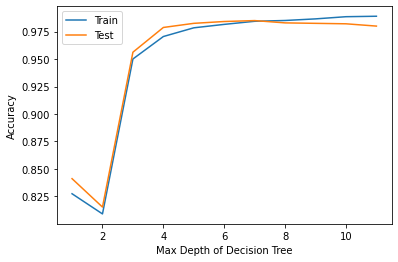

In [40]:
tf.plot(kind='line', xlabel='Max Depth of Decision Tree', ylabel = 'Accuracy');

In [41]:
rec = recall_score(y_test, pred)
pre = precision_score(y_test, pred)
f1_scre = f1_score(y_test, pred)
acc_tree = accuracy_score(y_test, pred)

conf = confusion_matrix(y_test, pred)

print("accuracy is {}.".format(acc_tree))
print("\nf1-score is {}.".format(f1_scre))
print("recall is {}.".format(rec))
print("precision is {}.".format(pre))
print("\nconfusion matrix is:\n {}.".format(conf))

accuracy is 0.9729053772405168.

f1-score is 0.9154746423927178.
recall is 0.9190600522193212.
precision is 0.9119170984455959.

confusion matrix is:
 [[1982   34]
 [  31  352]].


In [47]:
df.left.value_counts()

0.0    10000
1.0     1991
Name: left, dtype: int64

In [48]:
from sklearn.tree import plot_tree

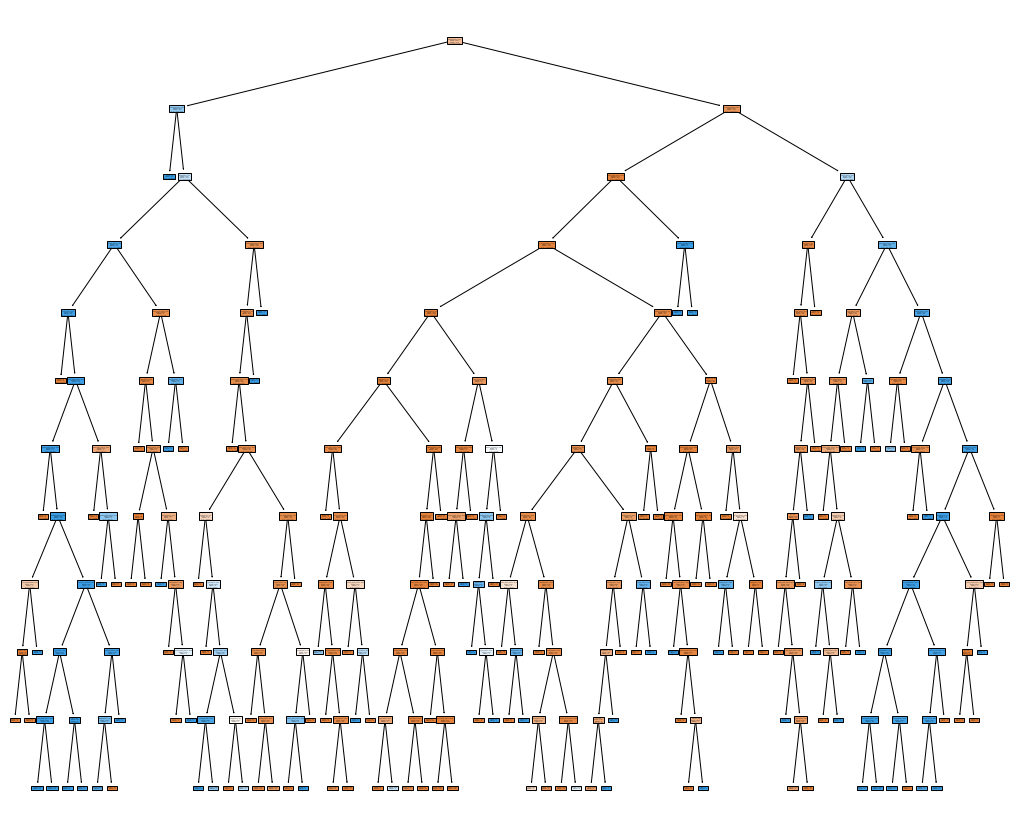

In [49]:
plt.figure(figsize=(18, 15))
plot_tree(DT, feature_names=df.columns, filled=True);

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
DT = DecisionTreeClassifier()

param = {'criterion':['gini', 'entropy'],
        'max_depth':[3, 4, 5, 6, 7, 8, 12],
        'min_samples_split':[2, 3, 4, 5, 6],
        'min_samples_leaf':[1, 2, 3, 4, 5],
        'class_weight':['balanced', {0:0.4, 1:0.6}]}

GS = GridSearchCV(DT, param, cv=10, scoring='accuracy')

GS.fit(X, y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced', {0: 0.4, 1: 0.6}],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 12],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5, 6]},
             scoring='accuracy')

In [52]:
GS.best_params_

{'class_weight': {0: 0.4, 1: 0.6},
 'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [53]:
GS.best_score_

0.982986864053378

In [54]:
from sklearn.model_selection import cross_val_predict, cross_val_score

In [55]:
DT = DecisionTreeClassifier( class_weight = {0: 0.4, 1: 0.6},
                             criterion = 'gini',
                             max_depth = 6,
                             min_samples_leaf = 1,
                             min_samples_split = 2)

acc = cross_val_score(DT, X, y, cv=10, scoring='accuracy')
acc_tree = acc.mean()
acc_tree

0.982986864053378

In [56]:
pred = cross_val_predict(DT, X, y, cv=10)

accuracy_score(y, pred)

0.9827370527895922

In [57]:
DT = DecisionTreeClassifier( class_weight = {0: 0.4, 1: 0.6},
                             criterion = 'gini',
                             max_depth = 6,
                             min_samples_leaf = 1,
                             min_samples_split = 2)

DT.fit(X_train, y_train)

pred = DT.predict(X_test)

(pred==y_test).mean()

0.9849937473947478

In [58]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [59]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [60]:
# sfs = SFS(DecisionTreeClassifier(class_weight = 'balanced',
#                                  criterion = 'entropy', max_depth = 5, min_samples_leaf = 5, min_samples_split = 2),
#          k_features = (1, 13),
#           forward= True,
#           floating = False,
#           verbose= 2,
#           scoring= 'accuracy',
#           cv = 4,
#           n_jobs= -1
#          ).fit(X_train, y_train)

# print(sfs.k_score_)
# print(sfs.k_feature_names_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  17 | elapsed:    2.5s remaining:   12.1s
[Parallel(n_jobs=-1)]: Done  12 out of  17 | elapsed:    2.6s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    2.6s finished

[2022-02-02 04:38:26] Features: 1/13 -- score: 0.9104462051709759[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.0s finished

[2022-02-02 04:38:26] Features: 2/13 -- score: 0.9475604670558798[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.0s finished

[2022-02-02 04:38:

0.9711217681401167
('satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company')



[2022-02-02 04:38:27] Features: 12/13 -- score: 0.9711217681401167[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished

[2022-02-02 04:38:27] Features: 13/13 -- score: 0.9711217681401167

In [61]:
SFS_Tree_score = sfs.k_score_
SFS_Tree_feature_names = list(sfs.k_feature_names_)
SFS_Tree_features_num = len(sfs.k_feature_idx_)
print(SFS_Tree_score)
print(SFS_Tree_feature_names)
print(SFS_Tree_features_num)

0.9711217681401167
['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']
5


In [63]:
# sbs = SFS(DecisionTreeClassifier(class_weight = 'balanced',
#                                  criterion = 'entropy', max_depth = 5, min_samples_leaf = 5, min_samples_split = 2),
#          k_features = (1, 13),
#           forward= False,
#           floating = False,
#           verbose= 2,
#           scoring= 'accuracy',
#           cv = 4,
#           n_jobs= -1
#          ).fit(X_train, y_train)

# print(sbs.k_score_)
# print(sbs.k_feature_names_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  17 | elapsed:    0.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  12 out of  17 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    0.1s finished

[2022-02-02 04:39:32] Features: 16/1 -- score: 0.9711217681401167[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.1s finished

[2022-02-02 04:39:32] Features: 15/1 -- score: 0.9712260216847373[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.0s finished

[2022-02-02 04:39:

0.9721643035863219
('satisfaction_level', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'RandD', 'accounting', 'hr', 'management', 'marketing', 'product_mng', 'sales')


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2022-02-02 04:39:33] Features: 1/1 -- score: 0.9104462051709759

In [64]:
SBS_Tree_score = sbs.k_score_
SBS_Tree_feature_names = list(sbs.k_feature_names_)
SBS_Tree_features_num = len(sbs.k_feature_idx_)
print(SBS_Tree_score)
print(SBS_Tree_feature_names)
print(SBS_Tree_features_num)

0.9721643035863219
['satisfaction_level', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'RandD', 'accounting', 'hr', 'management', 'marketing', 'product_mng', 'sales']
13


In [65]:
# efs = EFS(DecisionTreeClassifier(class_weight = 'balanced',
#                                  criterion = 'entropy', max_depth = 5, min_samples_leaf = 5, min_samples_split = 2),
#          min_features = 3,
#           max_features=10,
#           scoring= 'accuracy',
#           cv = None,
#           n_jobs= -1
#          ).fit(X_train, y_train)

Features: 3000/109140IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Features: 8393/109140IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Features: 13763/109140IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
Not

In [66]:
EFS_Tree_score = efs.best_score_
EFS_Tree_feature_names = list(efs.best_feature_names_)
EFS_Tree_features_num = len(efs.best_idx_)
print(EFS_Tree_score)
print(EFS_Tree_feature_names)
print(EFS_Tree_features_num)

0.9776897414512093
['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']
5


In [98]:
print(X_train.shape)
print(X_train_new.shape)

(9592, 17)
(9592, 8)


In [261]:
print(X_test.shape)
print(X_test_new.shape)

(2399, 17)
(2399, 8)


In [263]:
DT = DecisionTreeClassifier()

DT.fit(X_train_new, y_train)

pred = DT.predict(X_test_new)

pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [265]:
acc_tree_VIF = (y_test==pred).mean()
acc_tree_VIF

0.972488536890371

In [414]:
X_train_new.shape

(9592, 8)

In [415]:
sfs = SFS(DecisionTreeClassifier(class_weight = 'balanced',
                                 criterion = 'entropy', max_depth = 5, min_samples_leaf = 5, min_samples_split = 2),
         k_features = (2, 8),
          forward= True,
          floating = False,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1
         ).fit(X_train, y_train)

print(sfs.k_score_)
print(sfs.k_feature_names_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  17 | elapsed:    0.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  12 out of  17 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    0.0s finished

[2022-02-02 07:53:19] Features: 1/8 -- score: 0.9104462051709759[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.0s finished

[2022-02-02 07:53:19] Features: 2/8 -- score: 0.9475604670558798[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.0s finished

[2022-02-02 07:53:19

0.9711217681401167
('satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company')


[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.0s finished

[2022-02-02 07:53:20] Features: 6/8 -- score: 0.9711217681401167[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2022-02-02 07:53:20] Features: 7/8 -- score: 0.9711217681401167[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2022-02-02 07:53:20] Features: 8/8 -- score: 0.9711217681401167

In [416]:
SFS_Tree_score_VIF = sfs.k_score_
SFS_Tree_feature_names_VIF = list(sfs.k_feature_names_)
SFS_Tree_features_num_VIF = len(sfs.k_feature_idx_)
print(SFS_Tree_score_VIF)
print(SFS_Tree_feature_names_VIF)
print(SFS_Tree_features_num_VIF)

0.9711217681401167
['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']
5


In [417]:
sbs = SFS(DecisionTreeClassifier(class_weight = 'balanced',
                                 criterion = 'entropy', max_depth = 5, min_samples_leaf = 5, min_samples_split = 2),
         k_features = (2, 8),
          forward= False,
          floating = False,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1
         ).fit(X_train_new, y_train)

print(sbs.k_score_)
print(sbs.k_feature_names_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2022-02-02 07:54:23] Features: 7/2 -- score: 0.9711217681401167[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2022-02-02 07:54:24] Features: 6/2 -- score: 0.9721643035863219[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2022-02-02 07:54:24] Features: 5/2 -- score: 0.9721643035863219[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   

0.9721643035863219
('satisfaction_level', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'RandD')


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished

[2022-02-02 07:54:24] Features: 3/2 -- score: 0.9618432026688908[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished

[2022-02-02 07:54:24] Features: 2/2 -- score: 0.9475604670558798

In [418]:
SBS_Tree_score_VIF = sbs.k_score_
SBS_Tree_feature_names_VIF = list(sbs.k_feature_names_)
SBS_Tree_features_num_VIF = len(sbs.k_feature_idx_)
print(SBS_Tree_score_VIF)
print(SBS_Tree_feature_names_VIF)
print(SBS_Tree_features_num_VIF)

0.9721643035863219
['satisfaction_level', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'RandD']
6


In [420]:
efs = EFS(DecisionTreeClassifier(class_weight = 'balanced',
                                 criterion = 'entropy', max_depth = 5, min_samples_leaf = 5, min_samples_split = 2),
         min_features = 3,
          max_features=8,
          scoring= 'accuracy',
          cv = None,
          n_jobs= -1
         ).fit(X_train_new, y_train)

Features: 219/219

In [421]:
EFS_Tree_score_VIF = efs.best_score_
EFS_Tree_feature_names_VIF = list(efs.best_feature_names_)
EFS_Tree_features_num_VIF = len(efs.best_idx_)
print(EFS_Tree_score_VIF)
print(EFS_Tree_feature_names_VIF)
print(EFS_Tree_features_num_VIF)

0.9776897414512093
['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']
5


# KNN

In [270]:
from sklearn.neighbors import KNeighborsClassifier

In [311]:
KNN = KNeighborsClassifier(n_neighbors=7, weights='distance')

acc = cross_val_score(KNN, X, y, cv=10, scoring='accuracy')
    
acc.mean()

0.9502962190714485

In [312]:
KNN = KNeighborsClassifier()

KNN.fit(X_train, y_train)

pred = KNN.predict(X_test)

acc_KNN_train_test = (y_test==pred).mean()
acc_KNN_train_test

0.952897040433514

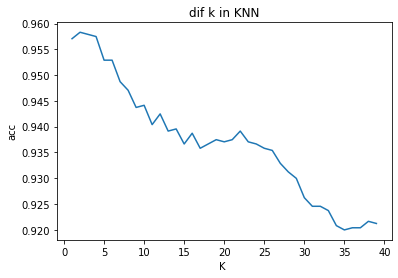

In [273]:
k_range = list(range(1, 40))

scores = []

for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)

plt.xlabel('K ')
plt.ylabel('acc')
plt.title('dif k in KNN')
plt.show()

In [274]:
KNN = KNeighborsClassifier()

k_range = list(range(1, 25))

param = {'weights':['uniform', 'distance'],
        'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
        'n_neighbors':k_range}

GS = GridSearchCV(KNN, param, cv=10, scoring='accuracy')

GS.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [275]:
GS.best_params_

{'algorithm': 'auto', 'n_neighbors': 2, 'weights': 'uniform'}

In [276]:
GS.best_score_

0.9593033083124827

In [277]:
KNN = KNeighborsClassifier(algorithm = 'auto', n_neighbors=2, weights='uniform')

acc = cross_val_score(KNN, X, y, cv=10, scoring='accuracy')
    
acc_KNN = acc.mean()
acc_KNN

0.9593033083124827

In [278]:
KNN = KNeighborsClassifier(algorithm = 'auto', n_neighbors=2, weights='uniform')

KNN.fit(X_train, y_train)

pred = KNN.predict(X_test)

acc_KNN_train_test = (y_test==pred).mean()
acc_KNN_train_test

0.9583159649854106

In [281]:
sfs = SFS(KNeighborsClassifier(algorithm = 'auto', n_neighbors=2, weights='uniform'),
          k_features = (3, 12),
          forward= True,
          floating = False,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1
         ).fit(X_train, y_train)

print(sfs.k_score_)
print(sfs.k_feature_names_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  17 | elapsed:    0.4s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  12 out of  17 | elapsed:    1.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    1.6s finished

[2022-02-02 05:58:19] Features: 1/12 -- score: 0.8863636363636364[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  16 | elapsed:    0.3s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done  11 out of  16 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.7s finished

[2022-02-02 05:58:20] Features: 2/12 -- score: 0.9231651376146789[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    0.5s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.7s finished

[2022-02-02 05:58:

0.9741451209341117
('satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'marketing')


[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.6s finished

[2022-02-02 05:58:28] Features: 12/12 -- score: 0.9707047539616347

In [282]:
SFS_KNN_score = sfs.k_score_
SFS_KNN_feature_names = list(sfs.k_feature_names_)
SFS_KNN_features_num = len(sfs.k_feature_idx_)
print(SFS_KNN_score)
print(SFS_KNN_feature_names)
print(SFS_KNN_features_num)

0.9741451209341117
['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'marketing']
6


In [285]:
# sbs = SFS(KNeighborsClassifier(algorithm = 'auto', n_neighbors=2, weights='uniform'),
#          k_features = (3, 12),
#           forward= False,
#           floating = False,
#           verbose= 2,
#           scoring= 'accuracy',
#           cv = 4,
#           n_jobs= -1
#          ).fit(X_train, y_train)

# print(sbs.k_score_)
# print(sbs.k_feature_names_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  17 | elapsed:    6.7s remaining:   31.7s
[Parallel(n_jobs=-1)]: Done  12 out of  17 | elapsed:    6.8s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    9.1s finished

[2022-02-02 06:02:15] Features: 16/3 -- score: 0.9623644703919934[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  16 | elapsed:    1.1s remaining:    8.5s
[Parallel(n_jobs=-1)]: Done  11 out of  16 | elapsed:    1.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    1.9s finished

[2022-02-02 06:02:17] Features: 15/3 -- score: 0.9652835696413677[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    1.1s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    1.7s finished

[2022-02-02 06:02:

0.9741451209341117
('satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'marketing')


[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s finished

[2022-02-02 06:02:28] Features: 3/3 -- score: 0.9588198498748958

In [287]:
SBS_KNN_score = sbs.k_score_
SBS_KNN_feature_names = list(sbs.k_feature_names_)
SBS_KNN_features_num = len(sbs.k_feature_idx_)
print(SBS_KNN_score)
print(SBS_KNN_feature_names)
print(SBS_KNN_features_num)

0.9741451209341117
['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'marketing']
6


In [289]:
efs = EFS(KNeighborsClassifier(algorithm = 'auto', n_neighbors=2, weights='uniform'),
         min_features = 2,
          max_features=3,
          scoring= 'accuracy',
          cv = None,
          n_jobs= -1
         ).fit(X_train, y_train)

Features: 816/816

In [290]:
EFS_KNN_score = efs.best_score_
EFS_KNN_feature_names = list(efs.best_feature_names_)
EFS_KNN_features_num = len(efs.best_idx_)
print(EFS_KNN_score)
print(EFS_KNN_feature_names)
print(EFS_KNN_features_num)

0.9744578815679733
['satisfaction_level', 'average_montly_hours', 'time_spend_company']
3


In [296]:
X_train_new = X_train
X_test_new = X_test

In [301]:
print(X_train_new.shape)
print(X_test_new.shape)

(9592, 17)
(2399, 17)


In [299]:
# from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.metrics import accuracy_score

for i in range(1, X_train.shape[1]+1):
#     lm = LinearRegression() #creat LR model on train set
#     lm.fit(X_train,y_train)
    
    DT = DecisionTreeClassifier()
    DT.fit(X_train, y_train)
    
    rfe = RFE(DT, i) #fit RFE model with different number of features 1 to 32
    rfe = rfe.fit(X_train, y_train)
    
    y_pred= rfe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    if acc>0.97:
        best_n_feature = i
        print('best number of feature:',best_n_feature)
        print('acc based on best number of feature:',acc)

In [ ]:
KNN = KNeighborsClassifier()

KNN.fit(X_train, y_train)

pred = KNN.predict(X_test)

In [316]:
for i in range(1, X_train.shape[1]+1):
   
    KNN = KNeighborsClassifier()

    KNN.fit(X_train, y_train)
    
    rfe = RFE(KNN, i)
    rfe = rfe.fit(X_train, y_train)
    
    y_pred= rfe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    if acc>0.97:
        best_n_feature = i
        print('best number of feature:',best_n_feature)
        print('acc based on best number of feature:',acc)

ValueError: when `importance_getter=='auto'`, the underlying estimator KNeighborsClassifier should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.

In [314]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

rfe = RFE(DT, 11)
rfe = rfe.fit(X_train, y_train)

# RFE (MODEL, Number of feature to select)

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [ ]:
X_train.columns[rfe.support_]

In [ ]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

In [ ]:
checkVIF(X_train_rfe)

In [ ]:
X_train_new = build_model(X_train_rfe,y_train)

# Naive Bayes

In [317]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [318]:
GNB = GaussianNB()
acc = cross_val_score(GNB, X, y, cv=10, scoring='accuracy')
acc_GaussianNB = acc.mean()
acc_GaussianNB

0.8185315540728384

In [319]:
MNB = MultinomialNB()
acc = cross_val_score(MNB, X, y, cv=10, scoring='accuracy')
acc.mean()

0.8339588546010563

In [320]:
GNB = GaussianNB()

GNB.fit(X_train, y_train)
pred = GNB.predict(X_test)

acc_GaussianNB_trainTest = (pred==y_test).mean()
acc_GaussianNB_trainTest

0.8399333055439766

In [322]:
sfs = SFS(GaussianNB(),
          k_features = (3, 12),
          forward= True,
          floating = False,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1
         ).fit(X_train, y_train)

print(sfs.k_score_)
print(sfs.k_feature_names_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  17 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  17 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    0.0s finished

[2022-02-02 07:23:42] Features: 1/12 -- score: 0.8442452043369475[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.0s finished

[2022-02-02 07:23:42] Features: 2/12 -- score: 0.8550875729774813[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.0s finished

[2022-02-02 07:23:

0.8595704753961635
('number_project', 'average_montly_hours', 'salary')


[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2022-02-02 07:23:42] Features: 10/12 -- score: 0.8558173477898249[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2022-02-02 07:23:43] Features: 11/12 -- score: 0.8544620517097581[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2022-02-02 07:23:43] Features: 12/12 -- score: 0.8508131776480401

In [323]:
SFS_GaussianNB_score = sfs.k_score_
SFS_GaussianNB_feature_names = list(sfs.k_feature_names_)
SFS_GaussianNB_features_num = len(sfs.k_feature_idx_)
print(SFS_GaussianNB_score)
print(SFS_GaussianNB_feature_names)
print(SFS_GaussianNB_features_num)

0.8595704753961635
['number_project', 'average_montly_hours', 'salary']
3


In [324]:
sbs = SFS(GaussianNB(),
         k_features = (3, 13),
          forward= False,
          floating = False,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1
         ).fit(X_train, y_train)

print(sbs.k_score_)
print(sbs.k_feature_names_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  17 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  12 out of  17 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    0.0s finished

[2022-02-02 07:24:15] Features: 16/3 -- score: 0.8361134278565472[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.0s finished

[2022-02-02 07:24:15] Features: 15/3 -- score: 0.8414303586321934[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.0s finished

[2022-02-02 07:24:

0.862698081734779
('last_evaluation', 'number_project', 'average_montly_hours', 'Work_accident', 'salary', 'RandD', 'management')


[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2022-02-02 07:24:16] Features: 6/3 -- score: 0.8603002502085071[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2022-02-02 07:24:16] Features: 5/3 -- score: 0.8603002502085072[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished

[2022-02-02 07:24:16] Features: 4/3 -- score: 0.8597789824854045[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished

[2022-02-02 07:24:16] Features: 3/3 -- score: 

In [325]:
SBS_GaussianNB_score = sbs.k_score_
SBS_GaussianNB_feature_names = list(sbs.k_feature_names_)
SBS_GaussianNB_features_num = len(sbs.k_feature_idx_)
print(SBS_GaussianNB_score)
print(SBS_GaussianNB_feature_names)
print(SBS_GaussianNB_features_num)

0.862698081734779
['last_evaluation', 'number_project', 'average_montly_hours', 'Work_accident', 'salary', 'RandD', 'management']
7


In [328]:
efs = EFS(GaussianNB(),
         min_features = 3,
          max_features=6,
          scoring= 'accuracy',
          cv = None,
          n_jobs= -1
         ).fit(X_train, y_train)

Features: 3000/21624IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Features: 8200/21624IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Features: 13551/21624IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
Notebo

In [329]:
EFS_GaussianNB_score = efs.best_score_
EFS_GaussianNB_feature_names = list(efs.best_feature_names_)
EFS_GaussianNB_features_num = len(efs.best_idx_)
print(EFS_GaussianNB_score)
print(EFS_GaussianNB_feature_names)
print(EFS_GaussianNB_features_num)

0.871768140116764
['last_evaluation', 'number_project', 'Work_accident', 'salary', 'RandD', 'product_mng']
6


In [330]:
X_train_new = X_train
X_test_new = X_test

In [331]:
print(X_train_new.shape)
print(X_test_new.shape)

(9592, 17)
(2399, 17)


In [332]:
# from sklearn.metrics import accuracy_score

for i in range(1, X_train.shape[1]+1):
#     lm = LinearRegression() #creat LR model on train set
#     lm.fit(X_train,y_train)
    
    GNB = GaussianNB()
    GNB.fit(X_train, y_train)
    
    rfe = RFE(GNB, i) #fit RFE model with different number of features 1 to 32
    rfe = rfe.fit(X_train, y_train)
    
    y_pred= rfe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    if acc>0.97:
        best_n_feature = i
        print('best number of feature:',best_n_feature)
        print('acc based on best number of feature:',acc)

ValueError: when `importance_getter=='auto'`, the underlying estimator GaussianNB should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.

# Logistic Regression

In [334]:
from sklearn.linear_model import LogisticRegression

In [335]:
loreg = LogisticRegression(class_weight='balanced')

loreg.fit(X_train, y_train)

y_pred = loreg.predict(X_test)

acc_logreg = accuracy_score(y_test, y_pred)
acc_logreg

0.7857440600250104

In [336]:
loreg = LogisticRegression()

param = {'class_weight':['balanced', {0:0.3, 1:0.7}, {0:0.4, 1:0.6}],
        'penalty':['l1', 'l2', 'elasticnet', 'none'],
        'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

GS = GridSearchCV(loreg, param, cv=10, scoring='accuracy')

GS.fit(X, y)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'class_weight': ['balanced', {0: 0.3, 1: 0.7},
                                          {0: 0.4, 1: 0.6}],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [337]:
GS.best_params_

{'class_weight': {0: 0.3, 1: 0.7}, 'penalty': 'l2', 'solver': 'liblinear'}

In [338]:
GS.best_score_

0.8153591882123992

In [339]:
loreg = LogisticRegression(class_weight = {0: 0.3, 1: 0.7},
                           penalty = 'l2', 
                           solver = 'liblinear')

loreg.fit(X_train, y_train)

y_pred = loreg.predict(X_test)

accuracy_score(y_test, y_pred)

0.822426010837849

In [340]:
loreg = LogisticRegression(class_weight = {0: 0.3, 1: 0.7},
                           penalty = 'l2', 
                           solver = 'liblinear')


acc = cross_val_score(loreg, X, y, cv=10, scoring='accuracy')
acc_logreg = acc.mean()
acc_logreg

0.8153591882123992

In [342]:
logreg = LogisticRegression(class_weight = {0: 0.3, 1: 0.7},
                           penalty = 'l2', 
                           solver = 'liblinear')

logreg.fit(X_train, y_train)
pred = logreg.predict(X_test)

acc_logreg_trainTest = (pred == y_test).mean()
acc_logreg_trainTest

0.822426010837849

In [344]:
# sfs = SFS(LogisticRegression(class_weight = {0: 0.3, 1: 0.7}, penalty = 'l2', solver = 'liblinear'),
#           k_features = (3, 12),
#           forward= True,
#           floating = False,
#           verbose= 2,
#           scoring= 'accuracy',
#           cv = 4,
#           n_jobs= -1
#          ).fit(X_train, y_train)

# print(sfs.k_score_)
# print(sfs.k_feature_names_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  17 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  12 out of  17 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    0.0s finished

[2022-02-02 07:31:18] Features: 1/12 -- score: 0.8323603002502085[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.0s finished

[2022-02-02 07:31:18] Features: 2/12 -- score: 0.8323603002502085[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.0s finished

[2022-02-02 07:31:

0.8323603002502085
('last_evaluation', 'number_project', 'average_montly_hours')


[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2022-02-02 07:31:18] Features: 9/12 -- score: 0.8323603002502085[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2022-02-02 07:31:18] Features: 10/12 -- score: 0.8323603002502085[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2022-02-02 07:31:18] Features: 11/12 -- score: 0.8323603002502085[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2022-02-02 07:31:18] Features: 12/12 -- 

In [345]:
SFS_logreg_score = sfs.k_score_
SFS_logreg_feature_names = list(sfs.k_feature_names_)
SFS_logreg_features_num = len(sfs.k_feature_idx_)
print(SFS_logreg_score)
print(SFS_logreg_feature_names)
print(SFS_logreg_features_num)

0.8323603002502085
['last_evaluation', 'number_project', 'average_montly_hours']
3


In [346]:
# sbs = SFS(LogisticRegression(class_weight = {0: 0.3, 1: 0.7}, penalty = 'l2', solver = 'liblinear'),
#          k_features = (1, 13),
#           forward= False,
#           floating = False,
#           verbose= 2,
#           scoring= 'accuracy',
#           cv = 4,
#           n_jobs= -1
#          ).fit(X_train, y_train)

# print(sbs.k_score_)
# print(sbs.k_feature_names_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  17 | elapsed:    0.0s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  12 out of  17 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    0.1s finished

[2022-02-02 07:31:51] Features: 16/1 -- score: 0.8265221017514595[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.0s finished

[2022-02-02 07:31:51] Features: 15/1 -- score: 0.8313177648040033[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.0s finished

[2022-02-02 07:31:

0.8492493744787324
('satisfaction_level', 'number_project', 'Work_accident', 'promotion_last_5years', 'RandD', 'management', 'marketing', 'product_mng')


[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2022-02-02 07:31:52] Features: 6/1 -- score: 0.8474770642201835[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2022-02-02 07:31:52] Features: 5/1 -- score: 0.8465387823185988[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished

[2022-02-02 07:31:52] Features: 4/1 -- score: 0.844974979149291[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished

[2022-02-02 07:31:52] Features: 3/1 -- score: 0

In [347]:
SBS_logreg_score = sbs.k_score_
SBS_logreg_feature_names = list(sbs.k_feature_names_)
SBS_logreg_features_num = len(sbs.k_feature_idx_)
print(SBS_logreg_score)
print(SBS_logreg_feature_names)
print(SBS_logreg_features_num)

0.8492493744787324
['satisfaction_level', 'number_project', 'Work_accident', 'promotion_last_5years', 'RandD', 'management', 'marketing', 'product_mng']
8


In [348]:
# efs = EFS(LogisticRegression(class_weight = {0: 0.3, 1: 0.7}, penalty = 'l2', solver = 'liblinear'),
#          min_features = 3,
#           max_features=5,
#           scoring= 'accuracy',
#           cv = None,
#           n_jobs= -1
#          ).fit(X_train, y_train)

Features: 3000/9248IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Features: 8067/9248IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [349]:
EFS_logreg_score = efs.best_score_
EFS_logreg_feature_names = list(efs.best_feature_names_)
EFS_logreg_features_num = len(efs.best_idx_)
print(EFS_logreg_score)
print(EFS_logreg_feature_names)
print(EFS_logreg_features_num)

0.8499791492910759
['satisfaction_level', 'number_project', 'Work_accident', 'RandD', 'management']
5


In [355]:
X_train_new = X_train
X_test_new = X_test

In [356]:
print(X_train_new.shape)
print(X_test_new.shape)

(9592, 17)
(2399, 17)


In [357]:
for i in range(1, X_train.shape[1]+1):
#     lm = LinearRegression() #creat LR model on train set
#     lm.fit(X_train,y_train)
    
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    
    rfe = RFE(logreg, i) #fit RFE model with different number of features 1 to 32
    rfe = rfe.fit(X_train, y_train)
    
    y_pred= rfe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    if acc>0.80:
        best_n_feature = i
        print('best number of feature:',best_n_feature)
        print('acc based on best number of feature:',acc)

best number of feature: 1
acc based on best number of feature: 0.8770320967069613
best number of feature: 2
acc based on best number of feature: 0.8420175072947061
best number of feature: 3
acc based on best number of feature: 0.838682784493539
best number of feature: 4
acc based on best number of feature: 0.8336807002917882
best number of feature: 5
acc based on best number of feature: 0.8395164651938307
best number of feature: 6
acc based on best number of feature: 0.8186744476865361
best number of feature: 7
acc based on best number of feature: 0.822842851187995
best number of feature: 8
acc based on best number of feature: 0.8211754897874114
best number of feature: 9
acc based on best number of feature: 0.8220091704877032
best number of feature: 10
acc based on best number of feature: 0.822426010837849
best number of feature: 11
acc based on best number of feature: 0.822426010837849
best number of feature: 12
acc based on best number of feature: 0.822842851187995
best number of fea

In [358]:
loreg = LogisticRegression()
logreg.fit(X_train, y_train)

rfe = RFE(DT, 10)
rfe = rfe.fit(X_train, y_train)

# RFE (MODEL, Number of feature to select)

In [359]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('satisfaction_level', True, 1),
 ('last_evaluation', True, 1),
 ('number_project', True, 1),
 ('average_montly_hours', True, 1),
 ('time_spend_company', True, 1),
 ('Work_accident', False, 3),
 ('promotion_last_5years', False, 7),
 ('salary', True, 1),
 ('RandD', False, 2),
 ('accounting', True, 1),
 ('hr', False, 6),
 ('management', False, 4),
 ('marketing', False, 5),
 ('product_mng', False, 8),
 ('sales', True, 1),
 ('support', True, 1),
 ('technical', True, 1)]

In [360]:
X_train.columns[rfe.support_]

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'salary', 'accounting',
       'sales', 'support', 'technical'],
      dtype='object')

In [361]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,salary,accounting,sales,support,technical
0,0.494505,0.203125,0.4,0.261682,0.25,0.5,0.0,1.0,0.0,0.0
1,0.890110,0.515625,0.4,0.355140,0.25,0.5,0.0,0.0,0.0,0.0
2,0.879121,0.812500,0.2,0.322430,0.50,0.5,0.0,1.0,0.0,0.0
3,0.945055,0.593750,0.2,0.542056,0.25,0.5,0.0,1.0,0.0,0.0
4,0.802198,0.500000,0.0,0.883178,0.00,0.5,0.0,0.0,1.0,0.0


In [362]:
checkVIF(X_train_rfe)

,Features,VIF
3,average_montly_hours,5.91
1,last_evaluation,5.87
0,satisfaction_level,4.43
2,number_project,4.05
4,time_spend_company,2.39
5,salary,1.82
7,sales,1.64
9,technical,1.46
8,support,1.37
6,accounting,1.12


In [363]:
X_train_new = build_model(X_train_rfe,y_train)

Optimization terminated successfully.
         Current function value: 0.365338
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   left   No. Observations:                 9592
Model:                          Logit   Df Residuals:                     9582
Method:                           MLE   Df Model:                            9
Date:                Wed, 02 Feb 2022   Pseudo R-squ.:                  0.1920
Time:                        07:39:02   Log-Likelihood:                -3504.3
converged:                       True   LL-Null:                       -4336.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
satisfaction_level      -3.7098      0.106    -34.916      0.000      -3.918      -3.502

In [370]:
X_train_new = X_train_rfe.drop(['accounting'], axis = 1, inplace=True)

In [371]:
X_train_new = build_model(X_train_rfe,y_train)

Optimization terminated successfully.
         Current function value: 0.365357
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   left   No. Observations:                 9592
Model:                          Logit   Df Residuals:                     9583
Method:                           MLE   Df Model:                            8
Date:                Wed, 02 Feb 2022   Pseudo R-squ.:                  0.1919
Time:                        07:41:28   Log-Likelihood:                -3504.5
converged:                       True   LL-Null:                       -4336.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
satisfaction_level      -3.7043      0.106    -35.006      0.000      -3.912      -3.497

In [374]:
X_train_new = X_train_rfe.drop(['support'], axis = 1, inplace=True)

In [375]:
X_train_new = build_model(X_train_rfe,y_train)

Optimization terminated successfully.
         Current function value: 0.365371
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   left   No. Observations:                 9592
Model:                          Logit   Df Residuals:                     9584
Method:                           MLE   Df Model:                            7
Date:                Wed, 02 Feb 2022   Pseudo R-squ.:                  0.1919
Time:                        07:42:01   Log-Likelihood:                -3504.6
converged:                       True   LL-Null:                       -4336.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
satisfaction_level      -3.6955      0.104    -35.415      0.000      -3.900      -3.491

In [376]:
X_train_new = X_train_rfe.drop(['sales'], axis = 1, inplace=True)

In [377]:
X_train_new = build_model(X_train_rfe,y_train)

Optimization terminated successfully.
         Current function value: 0.365401
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   left   No. Observations:                 9592
Model:                          Logit   Df Residuals:                     9585
Method:                           MLE   Df Model:                            6
Date:                Wed, 02 Feb 2022   Pseudo R-squ.:                  0.1918
Time:                        07:42:34   Log-Likelihood:                -3504.9
converged:                       True   LL-Null:                       -4336.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
satisfaction_level      -3.6835      0.103    -35.736      0.000      -3.886      -3.481

In [378]:
X_train_new = X_train_rfe.drop(['technical'], axis = 1, inplace=True)

In [379]:
X_train_new = build_model(X_train_rfe,y_train)

Optimization terminated successfully.
         Current function value: 0.365502
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   left   No. Observations:                 9592
Model:                          Logit   Df Residuals:                     9586
Method:                           MLE   Df Model:                            5
Date:                Wed, 02 Feb 2022   Pseudo R-squ.:                  0.1916
Time:                        07:43:12   Log-Likelihood:                -3505.9
converged:                       True   LL-Null:                       -4336.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
satisfaction_level      -3.6693      0.102    -35.813      0.000      -3.870      -3.468

In [380]:
checkVIF(X_train_new)

,Features,VIF
1,last_evaluation,5.82
3,average_montly_hours,5.81
0,satisfaction_level,4.16
2,number_project,4.02
4,time_spend_company,2.37
5,salary,1.81


In [381]:
X_test_new = X_test[X_train_new.columns]

In [382]:
X_test_new

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,salary
0,0.923077,0.796875,0.4,0.200935,1.00,0.5
1,0.923077,0.234375,0.4,0.065421,0.25,0.0
2,0.978022,0.953125,0.2,0.528037,0.25,0.0
3,0.197802,0.406250,0.8,0.186916,0.25,1.0
4,0.989011,0.765625,0.6,0.771028,0.50,0.5
...,...,...,...,...,...,...
2394,0.857143,0.296875,0.2,0.640187,0.25,0.5
2395,0.494505,0.609375,0.4,0.481308,0.00,0.5
2396,0.626374,0.625000,0.2,0.200935,0.75,0.0
2397,0.120879,0.531250,0.8,0.864486,0.75,0.5


In [384]:
logreg = LogisticRegression(class_weight = {0: 0.3, 1: 0.7},
                           penalty = 'l2', 
                           solver = 'liblinear')

logreg.fit(X_train_new, y_train)
pred = logreg.predict(X_test_new)

acc_logreg_VIF = (pred == y_test).mean()
acc_logreg_VIF

0.8199249687369737

In [ ]:
# sfs = SFS(LogisticRegression(class_weight = {0: 0.3, 1: 0.7}, penalty = 'l2', solver = 'liblinear'),
#           k_features = (3, 12),
#           forward= True,
#           floating = False,
#           verbose= 2,
#           scoring= 'accuracy',
#           cv = 4,
#           n_jobs= -1
#          ).fit(X_train_new, y_train)

# print(sfs.k_score_)
# print(sfs.k_feature_names_)

In [385]:
SFS_logreg_score_VIF = sfs.k_score_
SFS_logreg_feature_names_VIF = list(sfs.k_feature_names_)
SFS_logreg_features_num_VIF = len(sfs.k_feature_idx_)
print(SFS_logreg_score_VIF)
print(SFS_logreg_feature_names_VIF)
print(SFS_logreg_features_num_VIF)

0.8323603002502085
['last_evaluation', 'number_project', 'average_montly_hours']
3


In [387]:
# sbs = SFS(LogisticRegression(class_weight = {0: 0.3, 1: 0.7}, penalty = 'l2', solver = 'liblinear'),
#          k_features = (2, 5),
#           forward= False,
#           floating = False,
#           verbose= 2,
#           scoring= 'accuracy',
#           cv = 4,
#           n_jobs= -1
#          ).fit(X_train_new, y_train)

# print(sbs.k_score_)
# print(sbs.k_feature_names_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    1.7s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    1.7s finished

[2022-02-02 07:48:27] Features: 5/2 -- score: 0.8217264386989158[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    1.3s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished

[2022-02-02 07:48:28] Features: 4/2 -- score: 0.83267306088407[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s


0.8384070058381985
('satisfaction_level', 'number_project', 'salary')


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.1s finished

[2022-02-02 07:48:30] Features: 3/2 -- score: 0.8384070058381985[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished

[2022-02-02 07:48:30] Features: 2/2 -- score: 0.8323603002502085

In [388]:
SBS_logreg_score_VIF = sbs.k_score_
SBS_logreg_feature_names_VIF = list(sbs.k_feature_names_)
SBS_logreg_features_num_VIF = len(sbs.k_feature_idx_)
print(SBS_logreg_score_VIF)
print(SBS_logreg_feature_names_VIF)
print(SBS_logreg_features_num_VIF)

0.8384070058381985
['satisfaction_level', 'number_project', 'salary']
3


In [389]:
X_train_new.shape

(9592, 6)

In [391]:
# efs = EFS(LogisticRegression(class_weight = {0: 0.3, 1: 0.7}, penalty = 'l2', solver = 'liblinear'),
#          min_features = 3,
#           max_features=6,
#           scoring= 'accuracy',
#           cv = None,
#           n_jobs= -1
#          ).fit(X_train_new, y_train)

Features: 42/42

In [392]:
EFS_logreg_score_VIF = efs.best_score_
EFS_logreg_feature_names_VIF = list(efs.best_feature_names_)
EFS_logreg_features_num_VIF = len(efs.best_idx_)
print(EFS_logreg_score_VIF)
print(EFS_logreg_feature_names_VIF)
print(EFS_logreg_features_num_VIF)

0.8371559633027523
['satisfaction_level', 'number_project', 'salary']
3


# Neural Network

In [423]:
from sklearn.neural_network import MLPClassifier

In [424]:
MLP = MLPClassifier()

acc = cross_val_score(MLP, X, y, cv=10, scoring='accuracy')

acc.mean()

0.9656410897970531

In [426]:
# MLP = MLPClassifier()

# param = {"activation" : ["relu" , "tanh"],
#          "hidden_layer_sizes":[(10), (20), (20,30)],
#          "max_iter" : [100, 200],
#          "solver": ["sgd", "adam"],
#          "learning_rate_init": [0.001, 0.0001],
#          "learning_rate":['invscaling']}

# GS = GridSearchCV(MLP, param, cv = 10, n_jobs=-1)
# GS.fit(X , y) 

GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'hidden_layer_sizes': [10, 20, (20, 30)],
                         'learning_rate': ['invscaling'],
                         'learning_rate_init': [0.001, 0.0001],
                         'max_iter': [100, 200], 'solver': ['sgd', 'adam']})

In [427]:
GS.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (20, 30),
 'learning_rate': 'invscaling',
 'learning_rate_init': 0.001,
 'max_iter': 200,
 'solver': 'adam'}

In [428]:
GS.best_score_

0.9690599805393383

In [429]:
MLP = MLPClassifier( activation = 'relu',
                      hidden_layer_sizes = (20, 30),
                      learning_rate = 'invscaling',
                      learning_rate_init = 0.001,
                      max_iter = 200,
                      solver = 'adam')

acc = cross_val_score(MLP, X, y, cv=10, scoring='accuracy', n_jobs=-1)
acc_MLP = acc.mean()
acc_MLP

0.9698108840700584

In [430]:
MLP = MLPClassifier( activation = 'relu',
                      hidden_layer_sizes = (20, 30),
                      learning_rate = 'invscaling',
                      learning_rate_init = 0.001,
                      max_iter = 200,
                      solver = 'adam')
MLP.fit(X_train, y_train)

pred = MLP.predict(X_test)

acc_MLP_trainTest = (pred==y_test).mean()
acc_MLP_trainTest

0.976240100041684

In [432]:
# sfs = SFS(MLPClassifier( activation = 'relu', hidden_layer_sizes = (20, 30),learning_rate = 'invscaling', 
#                         learning_rate_init = 0.001, max_iter = 200, solver = 'adam'),
#           k_features = (3, 8),
#           forward= True,
#           floating = False,
#           verbose= 2,
#           scoring= 'accuracy',
#           cv = 4,
#           n_jobs= -1
#          ).fit(X_train, y_train)

# print(sfs.k_score_)
# print(sfs.k_feature_names_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  17 | elapsed:    4.3s remaining:   20.3s
[Parallel(n_jobs=-1)]: Done  12 out of  17 | elapsed:    6.3s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:   16.6s finished

[2022-02-02 10:32:15] Features: 1/8 -- score: 0.9043994995829858[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  16 | elapsed:   19.2s remaining:  2.3min
[Parallel(n_jobs=-1)]: Done  11 out of  16 | elapsed:   25.0s remaining:   11.3s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:   38.2s finished

[2022-02-02 10:32:53] Features: 2/8 -- score: 0.9336947456213511[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:   25.9s remaining:   22.6s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   39.4s finished

[2022-02-02 10:33:32

0.9740408673894911
('satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'promotion_last_5years', 'marketing')


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   23.8s finished

[2022-02-02 10:36:04] Features: 8/8 -- score: 0.9725813177648039

In [433]:
SFS_MLP_score = sfs.k_score_
SFS_MLP_feature_names = list(sfs.k_feature_names_)
SFS_MLP_features_num = len(sfs.k_feature_idx_)
print(SFS_MLP_score)
print(SFS_MLP_feature_names)
print(SFS_MLP_features_num)

0.9740408673894911
['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'promotion_last_5years', 'marketing']
7


In [434]:
# sbs = SFS(MLPClassifier( activation = 'relu', hidden_layer_sizes = (20, 30),learning_rate = 'invscaling', 
#                         learning_rate_init = 0.001, max_iter = 200, solver = 'adam'),
#           forward= False,
#           floating = False,
#           verbose= 2,
#           scoring= 'accuracy',
#           cv = 4,
#           n_jobs= -1
#          ).fit(X_train, y_train)

# print(sbs.k_score_)
# print(sbs.k_feature_names_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  17 | elapsed:   25.3s remaining:  2.0min
[Parallel(n_jobs=-1)]: Done  12 out of  17 | elapsed:   26.0s remaining:   10.8s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:   42.2s finished

[2022-02-02 10:37:10] Features: 16/1 -- score: 0.969140950792327[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  16 | elapsed:   27.2s remaining:  3.2min
[Parallel(n_jobs=-1)]: Done  11 out of  16 | elapsed:   27.7s remaining:   12.6s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:   42.4s finished

[2022-02-02 10:37:53] Features: 15/1 -- score: 0.9692452043369475[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:   28.6s remaining:   25.0s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   42.8s finished

[2022-02-02 10:38:3

0.8949124270225187
('satisfaction_level',)


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   11.8s finished

[2022-02-02 10:43:27] Features: 1/1 -- score: 0.8949124270225187

In [435]:
SBS_MLP_score = sbs.k_score_
SBS_MLP_feature_names = list(sbs.k_feature_names_)
SBS_MLP_features_num = len(sbs.k_feature_idx_)
print(SBS_MLP_score)
print(SBS_MLP_feature_names)
print(SBS_MLP_features_num)

0.8949124270225187
['satisfaction_level']
1


In [437]:
# efs = EFS(MLPClassifier( activation = 'relu', hidden_layer_sizes = (20, 30),learning_rate = 'invscaling', 
#                         learning_rate_init = 0.001, max_iter = 200, solver = 'adam'),
#          min_features = 2,
#           max_features=3,
#           scoring= 'accuracy',
#           cv = None,
#           n_jobs= -1
#          ).fit(X_train, y_train)

Features: 816/816

In [438]:
EFS_MLP_score = efs.best_score_
EFS_MLP_feature_names = list(efs.best_feature_names_)
EFS_MLP_features_num = len(efs.best_idx_)
print(EFS_MLP_score)
print(EFS_MLP_feature_names)
print(EFS_MLP_features_num)

0.9696622185154296
['satisfaction_level', 'last_evaluation', 'time_spend_company']
3


In [439]:
X_train_new = X_train
X_test_new = X_test

In [440]:
for i in range(1, X_train.shape[1]+1):
#     lm = LinearRegression() #creat LR model on train set
#     lm.fit(X_train,y_train)
    
    mlp = MLPClassifier()
    mlp.fit(X_train, y_train)
    
    rfe = RFE(mlp, i) #fit RFE model with different number of features 1 to 32
    rfe = rfe.fit(X_train, y_train)
    
    y_pred= rfe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    if acc>0.80:
        best_n_feature = i
        print('best number of feature:',best_n_feature)
        print('acc based on best number of feature:',acc)

ValueError: when `importance_getter=='auto'`, the underlying estimator MLPClassifier should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.

# SVM

In [441]:
from sklearn.svm import SVC

In [442]:
SVM = SVC()

acc_SVM = cross_val_score(SVM, X, y, cv=10, scoring='accuracy')

acc_SVM.mean()

0.9541321239922157

In [ ]:
# SVM = SVC()

# params = {"kernel":['linear', 'poly', 'rbf'],
#          "class_weight":['balanced', {0:0.4, 1:0.6}],
#          "gamma" : [0.01, 0.1, 0.3, 0.7],
#          "C" : [0.01 , 0.1, 20, 100]}

# GS = GridSearchCV(SVM, params, cv=10, scoring='accuracy', n_jobs=-1)

# GS.fit(X, y)

In [ ]:
GS.best_params_

In [ ]:
GS.best_score_

In [445]:
SVM = SVC(C = 0.01,
          class_weight = 'balanced',
          degree = 2,
          gamma = 0.5,
          kernel = 'poly')

acc = cross_val_score(SVM, X, y, cv=10, scoring='accuracy', n_jobs=-1)
acc_SVM = acc.mean()
acc_SVM

0.7190407978871283

In [446]:
SVM = SVC(C = 0.01,
          class_weight = 'balanced',
          degree = 2,
          gamma = 0.5,
          kernel = 'poly')

SVM.fit(X_train, y_train)

pred = SVM.predict(X_test)

acc_SVM_trainTest = (pred==y_test).mean()
acc_SVM_trainTest

0.7298874531054607

In [447]:
sfs = SFS(SVC(C = 0.01, class_weight = 'balanced', degree = 2, gamma = 0.5, kernel = 'poly'),
          k_features = (3, 6),
          forward= True,
          floating = False,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1
         ).fit(X_train, y_train)

print(sfs.k_score_)
print(sfs.k_feature_names_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  17 | elapsed:    8.5s remaining:   39.9s
[Parallel(n_jobs=-1)]: Done  12 out of  17 | elapsed:   11.9s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:   14.9s finished

[2022-02-02 11:12:38] Features: 1/6 -- score: 0.4738323603002502[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  16 | elapsed:   11.6s remaining:  1.4min
[Parallel(n_jobs=-1)]: Done  11 out of  16 | elapsed:   12.7s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:   19.5s finished

[2022-02-02 11:12:57] Features: 2/6 -- score: 0.6419933277731443[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:   13.6s remaining:   11.9s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   20.1s finished

[2022-02-02 11:13:17

0.8182860717264386
('satisfaction_level', 'number_project', 'average_montly_hours')


[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed:   14.8s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   14.9s finished

[2022-02-02 11:14:13] Features: 6/6 -- score: 0.8176605504587156

In [448]:
SFS_SVM_score = sfs.k_score_
SFS_SVM_feature_names = list(sfs.k_feature_names_)
SFS_SVM_features_num = len(sfs.k_feature_idx_)
print(SFS_SVM_score)
print(SFS_SVM_feature_names)
print(SFS_SVM_features_num)

0.8182860717264386
['satisfaction_level', 'number_project', 'average_montly_hours']
3


In [450]:
sbs = SFS(SVC(C = 0.01, class_weight = 'balanced', degree = 2, gamma = 0.5, kernel = 'poly'),
          k_features = (3, 5),
          forward= False,
          floating = False,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1
         ).fit(X_train, y_train)

print(sbs.k_score_)
print(sbs.k_feature_names_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  17 | elapsed:   19.2s remaining:  1.5min
[Parallel(n_jobs=-1)]: Done  12 out of  17 | elapsed:   20.6s remaining:    8.5s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:   29.7s finished

[2022-02-02 11:16:15] Features: 16/3 -- score: 0.8182860717264387[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  16 | elapsed:   19.2s remaining:  2.3min
[Parallel(n_jobs=-1)]: Done  11 out of  16 | elapsed:   21.6s remaining:    9.8s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:   29.6s finished

[2022-02-02 11:16:45] Features: 15/3 -- score: 0.8220391993327774[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:   19.4s remaining:   17.0s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   27.7s finished

[2022-02-02 11:17:

0.8433069224353629
('last_evaluation', 'number_project', 'average_montly_hours', 'promotion_last_5years', 'marketing')



[2022-02-02 11:20:06] Features: 3/3 -- score: 0.842160133444537

In [451]:
SBS_SVM_score = sbs.k_score_
SBS_SVM_feature_names = list(sbs.k_feature_names_)
SBS_SVM_features_num = len(sbs.k_feature_idx_)
print(SBS_SVM_score)
print(SBS_SVM_feature_names)
print(SBS_SVM_features_num)

0.8433069224353629
['last_evaluation', 'number_project', 'average_montly_hours', 'promotion_last_5years', 'marketing']
5


In [452]:
efs = EFS(SVC(C = 0.01, class_weight = 'balanced', degree = 2, gamma = 0.5, kernel = 'poly'),
         min_features = 2,
          max_features=2,
          scoring= 'accuracy',
          cv = None,
          n_jobs= -1
         ).fit(X_train, y_train)

Features: 136/136

In [453]:
EFS_SVM_score = efs.best_score_
EFS_SVM_feature_names = list(efs.best_feature_names_)
EFS_SVM_features_num = len(efs.best_idx_)
print(EFS_SVM_score)
print(EFS_SVM_feature_names)
print(EFS_SVM_features_num)

0.8332985821517932
['last_evaluation', 'number_project']
2


In [454]:
X_train_new = X_train
X_test_new = X_test

In [455]:
for i in range(1, X_train.shape[1]+1):
    
    svm = SVC()
    svm.fit(X_train, y_train)
    
    rfe = RFE(svm, i) #fit RFE model with different number of features 1 to 32
    rfe = rfe.fit(X_train, y_train)
    
    y_pred= rfe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    if acc>0.80:
        best_n_feature = i
        print('best number of feature:',best_n_feature)
        print('acc based on best number of feature:',acc)

ValueError: when `importance_getter=='auto'`, the underlying estimator SVC should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.

# RandomForest

In [456]:
from sklearn.ensemble import RandomForestClassifier

In [457]:
efs = EFS(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs = -1),
          min_features = 2,
          max_features=3,
          scoring= 'accuracy',
          cv = None,
          n_jobs= -1
         ).fit(X_train, y_train)

Features: 816/816

In [470]:
EFS_RandomForest_score = efs.best_score_
EFS_RandomForest_feature_names = list(efs.best_feature_names_)
EFS_RandomForest_features_num = len(efs.best_idx_)
print(EFS_RandomForest_score)
print(EFS_RandomForest_feature_names)
print(EFS_RandomForest_features_num)

0.9985404503753128
['satisfaction_level', 'last_evaluation', 'average_montly_hours']
3


In [472]:
acc_RandomForest = EFS_RandomForest_score
acc_RandomForest

0.9985404503753128

# evaluation charts for model comparison

In [462]:
header = pd.MultiIndex.from_product([ ['Accuracy Resualt'],
                                       ['K-Fold:cv =10', 'Train:0.8-Test:0.2', 'VIF'] ])


method = ['DecisionTreeClassifier', 'KNeighborsClassifier', 'naiveBayes_GaussianNB',
         'LogisticRegression', 'Neural Network', 'SVM', 'RandomForest']

differentDataSetMethod = ['K-Fold:cv =10','K-Fold&with10Features', 'K-Fold&ItrativeImpute',
                          'K-Fold&KNN_FancyIMpute', 'Train:0.8-Test:0.2']

Tree =   [acc_tree, acc_tree_trainTest, acc_tree_VIF]
KNN =    [acc_KNN, acc_KNN_train_test, np.nan]
NB_GNB = [acc_GaussianNB, acc_GaussianNB_trainTest, np.nan]
LogReg = [acc_logreg, acc_logreg_trainTest, acc_logreg_VIF]
NN_MLP = [acc_MLP, acc_MLP_trainTest, np.nan]
SVM    = [acc_SVM, acc_SVM_trainTest, np.nan]
RandomForest = [np.nan, acc_RandomForest, np.nan]

d = ([ Tree, KNN, NB_GNB, LogReg, NN_MLP, SVM, RandomForest])

Resualt = pd.DataFrame(d,
                      index=method,
                      columns=header)

In [463]:
Resualt

Accuracy Resualt                             
                          K-Fold:cv =10 Train:0.8-Test:0.2       VIF
DecisionTreeClassifier         0.982987           0.969154  0.972489
KNeighborsClassifier           0.959303           0.952897       NaN
naiveBayes_GaussianNB          0.818532           0.839933       NaN
LogisticRegression             0.815359           0.822426  0.819925
Neural Network                 0.969811           0.976240       NaN
SVM                            0.719041           0.729887       NaN
RandomForest                        NaN           0.998540       NaN

In [464]:
Resualt.style.background_gradient(cmap='Greens')

In [487]:
# Resualt.to_csv('F:/O_C/T_U_C/dS_C9/7_Py(T)/3T/projects_classification/HR/Resualt/resualt.csv')

In [465]:
Resualt_Stack = Resualt.stack()

In [466]:
Resualt_Stack

Accuracy Resualt
DecisionTreeClassifier K-Fold:cv =10               0.982987
                       Train:0.8-Test:0.2          0.969154
                       VIF                         0.972489
KNeighborsClassifier   K-Fold:cv =10               0.959303
                       Train:0.8-Test:0.2          0.952897
naiveBayes_GaussianNB  K-Fold:cv =10               0.818532
                       Train:0.8-Test:0.2          0.839933
LogisticRegression     K-Fold:cv =10               0.815359
                       Train:0.8-Test:0.2          0.822426
                       VIF                         0.819925
Neural Network         K-Fold:cv =10               0.969811
                       Train:0.8-Test:0.2          0.976240
SVM                    K-Fold:cv =10               0.719041
                       Train:0.8-Test:0.2          0.729887
RandomForest           Train:0.8-Test:0.2          0.998540

In [467]:
Resualt_Stack.style.background_gradient(cmap='Greens')

In [488]:
# Resualt_Stack.to_csv('F:/O_C/T_U_C/dS_C9/7_Py(T)/3T/projects_classification/HR/Resualt/resualt_Stack.csv')

In [473]:
header = pd.MultiIndex.from_product([ ['Accuracy Resualt'],
                                       ['SBS','SFS', 'EFS', 'SBS_VIF','SFS_VIF', 'EFS_VIF'] ])


method = ['DecisionTreeClassifier', 'KNeighborsClassifier', 'naiveBayes_GaussianNB',
         'LogisticRegression', 'Neural Network', 'SVM', 'RandomForest']

Tree =   [SBS_Tree_score, SFS_Tree_score, EFS_Tree_score, SFS_Tree_score_VIF, SFS_Tree_score_VIF, EFS_Tree_score_VIF]
KNN =    [SBS_KNN_score, SFS_KNN_score, EFS_KNN_score, np.nan, np.nan, np.nan]
NB_GNB = [SBS_GaussianNB_score, SFS_KNN_score, EFS_KNN_score, np.nan, np.nan, np.nan]
LogReg = [SBS_logreg_score, SFS_logreg_score, EFS_logreg_score, SBS_logreg_score_VIF, SFS_logreg_score_VIF, EFS_logreg_score_VIF]
NN_MLP = [SBS_MLP_score, SFS_MLP_score, EFS_MLP_score, np.nan, np.nan, np.nan]
SVM    = [SBS_SVM_score, SFS_SVM_score, EFS_SVM_score, np.nan, np.nan, np.nan]
RandomForest = [np.nan , np.nan,EFS_RandomForest_score, np.nan, np.nan, np.nan]

d = ([ Tree, KNN, NB_GNB, LogReg, NN_MLP, SVM, RandomForest])

Resualt_search = pd.DataFrame(d,
                      index=method,
                      columns=header)

In [474]:
Resualt_search

Accuracy Resualt                                \
                                    SBS       SFS       EFS   SBS_VIF   
DecisionTreeClassifier         0.972164  0.971122  0.977690  0.971122   
KNeighborsClassifier           0.974145  0.974145  0.974458       NaN   
naiveBayes_GaussianNB          0.862698  0.974145  0.974458       NaN   
LogisticRegression             0.849249  0.832360  0.849979  0.838407   
Neural Network                 0.894912  0.974041  0.969662       NaN   
SVM                            0.843307  0.818286  0.833299       NaN   
RandomForest                        NaN       NaN  0.998540       NaN   

                                            
                         SFS_VIF   EFS_VIF  
DecisionTreeClassifier  0.971122  0.977690  
KNeighborsClassifier         NaN       NaN  
naiveBayes_GaussianNB        NaN       NaN  
LogisticRegression      0.832360  0.837156  
Neural Network               NaN       NaN  
SVM                          NaN       NaN  
RandomForest                 NaN       NaN

In [475]:
Resualt_search.style.background_gradient(cmap='Greens')

In [489]:
# Resualt_search.to_csv('F:/O_C/T_U_C/dS_C9/7_Py(T)/3T/projects_classification/HR/Resualt/resualt_search.csv')

In [476]:
Resualt_search_Stack = Resualt_search.stack()

In [477]:
Resualt_search_Stack

Accuracy Resualt
DecisionTreeClassifier EFS              0.977690
                       EFS_VIF          0.977690
                       SBS              0.972164
                       SBS_VIF          0.971122
                       SFS              0.971122
                       SFS_VIF          0.971122
KNeighborsClassifier   EFS              0.974458
                       SBS              0.974145
                       SFS              0.974145
naiveBayes_GaussianNB  EFS              0.974458
                       SBS              0.862698
                       SFS              0.974145
LogisticRegression     EFS              0.849979
                       EFS_VIF          0.837156
                       SBS              0.849249
                       SBS_VIF          0.838407
                       SFS              0.832360
                       SFS_VIF          0.832360
Neural Network         EFS              0.969662
                       SBS              0.894912
                       SFS              0.974041
SVM                    EFS              0.833299
                       SBS              0.843307
                       SFS              0.818286
RandomForest           EFS              0.998540

In [478]:
Resualt_search_Stack.style.background_gradient(cmap='YlOrRd')

In [493]:
Resualt_search_Stack.to_csv('F:/O_C/T_U_C/dS_C9/7_Py(T)/3T/projects_classification/HR/Resualt/resualt_search_stack.csv')

In [480]:
header = pd.MultiIndex.from_product([ ['SBS', 'numberOfFeatures',
                                       'SFS', 'numberOfFeatures',
                                       'EFS', 'numberOfFeatures'  ] ])


method = ['DecisionTreeClassifier', 'KNeighborsClassifier', 'naiveBayes_GaussianNB',
         'LogisticRegression', 'Neural Network', 'SVM', 'RandomForest']

Tree =   [SBS_Tree_score, SBS_Tree_features_num,
          SFS_Tree_score, SFS_Tree_features_num,
          EFS_Tree_score, EFS_Tree_features_num]
KNN =    [SBS_KNN_score, SBS_KNN_features_num,
          SFS_KNN_score, SFS_KNN_features_num,
          EFS_KNN_score, EFS_KNN_features_num]
NB_GNB = [SBS_GaussianNB_score, SBS_GaussianNB_features_num,
          SFS_GaussianNB_score, SFS_GaussianNB_features_num,
          EFS_GaussianNB_score, EFS_GaussianNB_features_num]
LogReg = [SBS_logreg_score, SBS_logreg_features_num,
          SFS_logreg_score, SFS_logreg_features_num,
          EFS_logreg_score, EFS_logreg_features_num]
NN_MLP = [SBS_MLP_score, SBS_MLP_features_num,
          SFS_MLP_score, SFS_MLP_features_num,
          EFS_MLP_score, EFS_MLP_features_num]
SVM    = [SBS_SVM_score, SBS_SVM_features_num,
          SFS_SVM_score, SFS_SVM_features_num,
          EFS_SVM_score, EFS_SVM_features_num]
RandomForest = [np.nan , np.nan,
                np.nan, np.nan,
                EFS_RandomForest_score, EFS_RandomForest_features_num]

d = ([ Tree, KNN, NB_GNB, LogReg, NN_MLP, SVM, RandomForest])

Resualt_Search_acc_NumFeatures = pd.DataFrame(d,
                                  index=method,
                                  columns=header)


In [483]:
Resualt_Search_acc_NumFeatures

,SBS,numberOfFeatures,SFS,numberOfFeatures,EFS,numberOfFeatures
DecisionTreeClassifier,0.972164,13.0,0.971122,5.0,0.977690,5
KNeighborsClassifier,0.974145,6.0,0.974145,6.0,0.974458,3
naiveBayes_GaussianNB,0.862698,7.0,0.859570,3.0,0.871768,6
LogisticRegression,0.849249,8.0,0.832360,3.0,0.849979,5
Neural Network,0.894912,1.0,0.974041,7.0,0.969662,3
SVM,0.843307,5.0,0.818286,3.0,0.833299,2
RandomForest,NaN,NaN,NaN,NaN,0.998540,3


In [492]:
Resualt_Search_acc_NumFeatures.to_csv('F:/O_C/T_U_C/dS_C9/7_Py(T)/3T/projects_classification/HR/Resualt/Resualt_Search_acc_NumFeatures.csv')